In [4]:
#import request  to install tesseract
import requests

In [11]:
import requests

url = 'https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata'
r = requests.get(url, stream=True)

file_path = "C:\\Users\\adhik\\Downloads\\text_extraction_from_image.traineddata"

try:
    with open(file_path, "wb") as file:
        for block in r.iter_content(chunk_size=1024):
            if block:
                file.write(block)
    print("File downloaded successfully.")
except Exception as e:
    print("Error:", e)


File downloaded successfully.


In [24]:
## installing librareis required for optical character recognition
!pip install pytesseract Wand
## importing IPython to clear output which is not important
from IPython.display import HTML, clear_output



Defaulting to user installation because normal site-packages is not writeable


In [25]:
## installing pytesseract and Opencv
! pip install pytesseract wand opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [26]:
#import libraries
from PIL import Image #open image load , see ,  etc(visualisation)
import pytesseract# to reading 
import cv2#image processing
import numpy as np#really you need to know?
from pytesseract import Output#to hold the output
import re

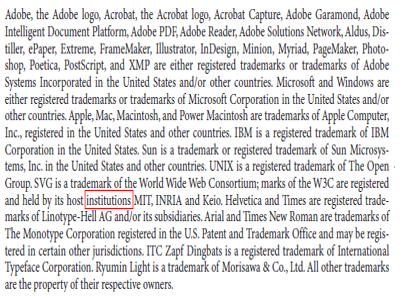

In [44]:
#reading image from a Url
image = Image.open(requests.get('https://i.sstatic.net/t3qWG.png',stream = True).raw)
image =  image.resize((400,300))
image.save('sample.png')
image


In [45]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [46]:
#simply extracting the text from images
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Inteligent Document Patform, Adobe PDF, Adbe Reader, Adobe Solutions Network, lds Dis
til, ePaper, Extreme, FrameMaker, lstratr, InDesign, Minion, Myriad, PageMaker, Photo-
shop, Petia, PostScript, and XMP are ther registered trademarks or trademarks of Adobe
Systems Incorporated in the United States andlor cher counties. Microsoft and Windows are
either registered trademarks or trademarks of Microsoft Corporatio inthe United Stats andor
ther countries Apple, Mac, Macintosh, and Power Macintosh ae trademarks of Apple Computer,
Inc, egisere inthe United States and oter countries IBM is a registered trademark of IM
Corporation in the United States Sun isa trademark o registered trademark of Sun Nicroy-
tes in inthe United Sates and other counties. UNIX isa registered trademark of The Open
Group SVG isa trademark ofthe Wold Wide Web Consortium; mars of the W3C ar registered
and held by its hot inition

In [48]:
# now its time to remove to remove irrelevent images and characters from the image
try:
    text=pytesseract.image_to_string(image,lang="eng")
    characters_to_remove = "!()@-*:|#$%^&*_~`"

    new_string = text
    for character in characters_to_remove:
        new_string = new_string.replace(character,"")
    print(new_string)
except IOError as e:
    print("Error (%s)." % e)

Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Inligent Document Platr, Adobe PF Adobe Reader doe Sots Network Ads Dis

See pried te te St der i cent co Wn a

trademarks rtrademats of Microsoft Corporatio inthe United Sates andor
he pee nov i a aden eCopt
Inc, egisere inthe United States and oter countries IBM is a registered trademark of IM
Corporation in the United States Sun isa trademark o registered trademark of Sun Nicroy
tes in inthe United Sates and other counties. UNIX isa registered trademark of The Open
Group. SVGisa trademark of th WorldWide Web Consortium; mais ofthe W3C ae eiered
and bel by its host intutons MIT, INRA and Kei. Helvetica and Times are registered trade.
atk of intypeHel AG andor subsidiaries, Aral and Times New Roman re rademaks of
‘The Monotype Corporation registered inthe US. Patent and Trademark Office and may be regis
tered in certain other juriictions ITC Zap Dinghat isa reitered trademark of International
“Typ

In [52]:
#now we will remove unwanted symbols from the text we extraccted by replacing the symbol with empty string
image = cv2.imread('sample.png')


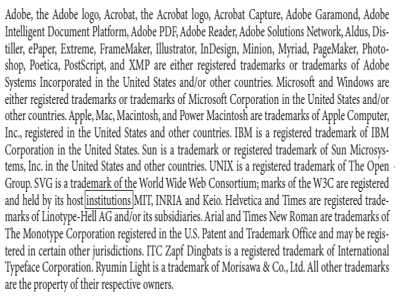

In [53]:
#now i will convert the image to gray scale
#function to convert to grayscale

def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

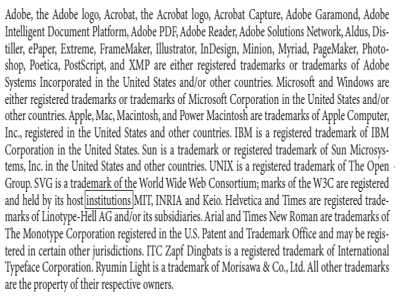

In [54]:
#now we will remove noise from the noise from the image. there the function cv2.medianBlur() 
#noise removal function
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

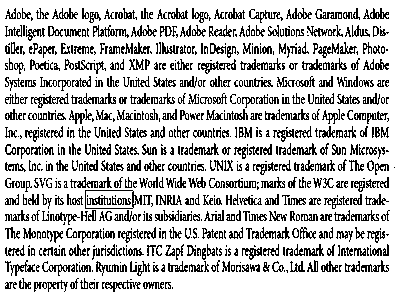

In [55]:
##now perform threshold transformation here cv2. 
#thresholding function
def thresholding(image):
    return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh  = thresholding(gray)
Image.fromarray(thresh)

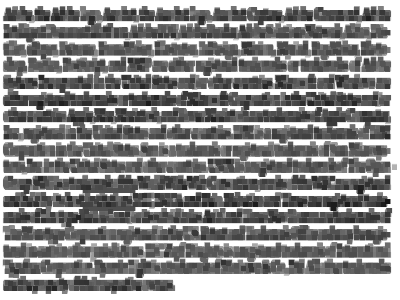

In [57]:
# now gonna do  erode transformation , its gonna perform erosion on the image. the basic idea of erosion  is just like soil erosion
#erosion
#erode function
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image,kernel,iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

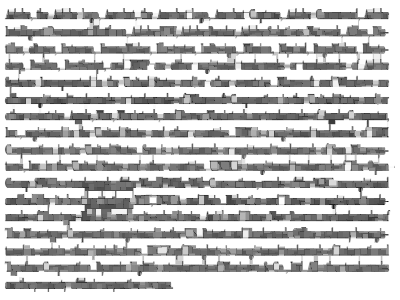

In [59]:
# here we  will perform morphological transformation it is usefull in opening in small holes inside foreground objects or small white points on the object
#morphology funnction
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
opening = opening(gray)
Image.fromarray(opening)

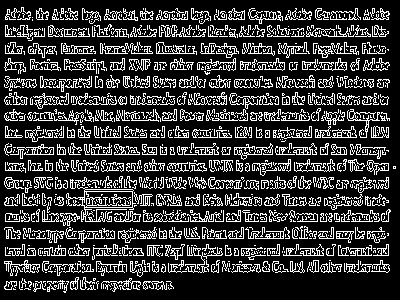

In [60]:
##canny transformation is used to  detect edges of the images
#edge detection function
def canny(image):
    return cv2.Canny(image,100,200)
canny = canny(gray)
Image.fromarray(canny)

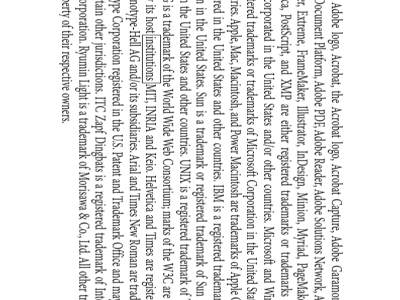

In [62]:
#now time for deskewing on the image. Deskewing is  a process whereby skew is removed by rotating an image by same amount as its skew
#skew correction  function
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90+angle)
    else:
        angle = -angle
    (h,w) = image.shape[:2]
    center = (w // 2,h // 2)
    M = cv2.getRotationMatrix2D(center,angle,1.0)
    rotated = cv2.warpAffine(image,M,(w,h), flags = cv2.INTER_CUBIC,borderMode = cv2.BORDER_REPLICATE)
    return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

In [64]:
#template matching
def match_template(image,template):
    return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
match = match_template(gray,gray)
match

array([[1.]], dtype=float32)

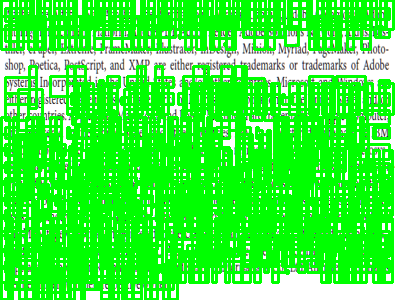

In [70]:
#drawing rectangele around the text
img = cv2.imread('sample.png')
h,w,c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

Image.fromarray(img)    

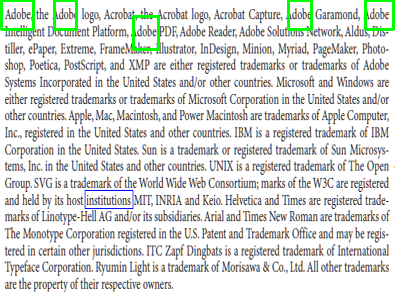

In [74]:
# drawing patterns on specific pattern or word 
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img,output_type = Output.DICT)
keys = list(d.keys())

date_patterns = 'Adobe'
n_boxes = len(d['text'])
# for i in range(n_boxes):
#     if int(d['conf'][i]) > 60:
#         if re.match(date_patterns,d['text'][i]:
#             (x,y,w,h) = (d['left'][i],d['top'][i],d['width'][i],d['height'][i])
#             img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# Image.fromarray(img)   
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_patterns, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

Image.fromarray(img)